# Setting up your `python` environment

We will be using `python 3` and `ipython notebook`/`jupyter` extensively in this course. You need to set up the correct `python` environment first. Below are some instructions in a Mac OS X 10.11 environment. You should be able to adapt it to other environments -- try Google if any problem.  

## Installing `anaconda` and `jupyter`

1. Download and install the `anaconda` installation package (for `python 3.6`) at https://www.continuum.io/downloads
2. Create a `py36` virtual environment by `conda create -n py36 python=3.6 anaconda`. See more at http://conda.pydata.org/docs/using/envs.html
3. Activiate `py36` (or put it on your `~/.bashrc`): `source activate py36`
4. To install a new package in an environment, switch to it and use `conda install -n PACKAGENAME` or `pip install PACKAGENAME`
5. Install `jupyter` by `conda install jupyter`


### Test you installation

```
% python -V
Python 3.6.1 :: Anaconda 4.4.0 (x86_64)
% ipython -V
5.3.0
% jupyter notebook
```


The last command shall open up a new page in your browser. Also check if you click the "new" button, there is a "python 3" choice under the 'notebooks'. 

## Using `jupyter`

Start with simple tutorial: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/index.html

Press `h` (you may need to press `ESC` first) to learn a few important keyboard shortcuts, e.g., 

* `SHIFT+RETURN`
* `A`, `B`, `X`
* `ESC`
* `ESC m`: to change the current cell to a `markdown` cell, 
* selecting multiple lines + `TAB` (indent them) / `Cmd + /` (block comment). 
* Note that mouse selection = copying to clipboard (sometimes annoying). 

Read the syntax of `markdown` at http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html and try it out by yourself. 

It also can display maths symbols/equations, e.g., $e^{ix} = cos(x) + i \cdot sin(x)$.

$$ P \implies Q  \qquad \equiv \qquad P \lor \neg Q $$

Try out cells with simple python code (or try the following cell in this notebook). 

**Tips**: 

* Recommended browser: firefox (Chrome has issues rendering maths fonts/equations)
* Your code may run into an infinite loop and you may HAVE TO kill the browser. So use a decent session manager for your browser. 

In [20]:
import random

n = 10
data = [random.randint(1, 10) for _ in range(n)]
data # this print out the variable's content

[4, 7, 3, 5, 7, 7, 7, 1, 10, 4]

## Exercise 1: Integer square root of an integer 

You need to write a function, `nsqrt()`, that takes as input an integer `x`, and return the largest integer that does not exceed $\sqrt{x}$. You need to abide by the following constraints:
1. The time complexity of your algorithm should be $O(\log x)$. 
2. You cannot use `sqrt()` function. 

For example, `nsqrt(11) = 3`, and `nsqrt(1369) = 37`. 


In [10]:
def nsqrt(x): # do not change the heading of the function
    eps = 0.001
    h = x/2
    w = x/h
    while (h - w > eps or w - h > eps):
        w = x/h
        h = (h + w)/2
    return int(h)

You can test your implementation using the following code.

In [11]:
print(nsqrt(11), nsqrt(1369))

3 37


## Exercise 2: Root finding 

Use [Newton's method](https://en.wikipedia.org/wiki/Newton's_method) to find a root of an equation numerically. Newton's method starts from $x_0$ and iteratively computes $$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}.$$

Let us consider find a $x$ such that $f(x) = x \ln(x) - 16 = 0$. First, we plot the function and it seems $x$ is close to 8.0.

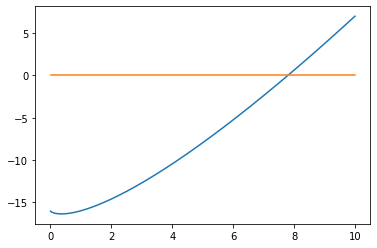

In [19]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import math

def f(x):
    return x * math.log(x) - 16.0

xvals = np.arange(0.01, 10, 0.01)        
yvals = np.array([f(x) for x in xvals])
plt.plot(xvals, yvals) 
plt.plot(xvals, 0*xvals)
plt.show()

To find $x$ for the equation, we need to compute the derivative of $f(x)$, i.e., $f'(x)$ first. 

$$f'(x) = (x \cdot \frac{1}{x} + 1 \cdot \ln(x)) + 0 = 1 + \ln(x)$$ 

We implement it as `fprime(x)`:

In [20]:
def fprime(x):
    return 1.0 + math.log(x)

Now you need to implement Newton's method below.

In [48]:
'''
x_0: initial guess
EPSILON: stop when abs(x - x_new) < EPSILON
MAX_ITER: maximum number of iterations

NOTE: you must use the default values of the above parameters, do not change them
'''
def find_root(f, fprime, x_0=1.0, EPSILON = 1E-7, MAX_ITER = 1000): # do not change the heading of the function
    x_new = x_0 - f(x_0)/fprime(x_0)
    if (abs(x_0 - x_new) < EPSILON or not MAX_ITER): return x_new
    return find_root(f, fprime, x_0=x_new, MAX_ITER=MAX_ITER-1)

You can test your implementation using the following code.

Note that we will test your code using a different $f(x)$ (and its corresponding $f'(x)$). You need to perform similar tests by yourself. 



In [49]:
x = find_root(f, fprime)
print(x)
print(f(x))

7.792741452820329
0.0


## Exercise 3: Enumerating Combinations

You need to write a function, `comb(n, k)`, that returns a list consisting of all the combinations of $k$ elements out of a set $\{1, 2, \ldots, n\}$. Your implementation should be using recursions instead of `for` loop (you may use *list comprehension* though).  

In [125]:
a = []
def comb(n, k): 
    arr = [i for i in range(1, n+1)]
    # A temporary array to  
    # store all combination 
    # one by one 
    data = [0]*k; 
  
    # Print all combination  
    # using temprary array 'data[]' 
    combinationUtil(arr, data, 0,  
                    n - 1, 0, k); 
    return a
  
# arr[] ---> Input Array 
# data[] ---> Temporary array to 
#         store current combination 
# start & end ---> Staring and Ending 
#             indexes in arr[] 
# index ---> Current index in data[] 
# r ---> Size of a combination  
# to be printed  
def combinationUtil(arr, data, start,  
                    end, index, r): 
                          
    # Current combination is ready  
    # to be printed, print it 
    if (index == r): 
        a.append(''.join(str(data[j]) for j in range(r)))
        return; 
  
    # replace index with all 
    # possible elements. The 
    # condition "end-i+1 >=  
    # r-index" makes sure that  
    # including one element at 
    # index will make a combination  
    # with remaining elements at  
    # remaining positions 
    i = start;  
    while(i <= end and end - i + 1 >= r - index): 
        data[index] = arr[i]; 
        combinationUtil(arr, data, i + 1,  
                        end, index + 1, r); 
        i += 1; 

In [126]:
comb(6, 4)

[&#39;1234&#39;,
 &#39;1235&#39;,
 &#39;1236&#39;,
 &#39;1245&#39;,
 &#39;1246&#39;,
 &#39;1256&#39;,
 &#39;1345&#39;,
 &#39;1346&#39;,
 &#39;1356&#39;,
 &#39;1456&#39;,
 &#39;2345&#39;,
 &#39;2346&#39;,
 &#39;2356&#39;,
 &#39;2456&#39;,
 &#39;3456&#39;]